In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
coordinates = list(lat_lngs)

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cape town za
cidreira br
hithadhoo mv
rikitea pf
luderitz na
marsa matruh eg
jamestown sh
yerbogachen ru
tsihombe mg
pauini br
port lincoln au
yellowknife ca
maarianhamina fi
madhupur in
saint george bm
ushuaia ar
bluff nz
busselton au
lavrentiya ru
macaboboni ph
vaini to
monrovia lr
cuamba mz
nabire id
norrtalje se
busselton au
bulgan mn
halalo wf
bluff nz
smithers ca
karratha au
somerset west za
cah ab af
lompoc us
flinders au
port alfred za
coihaique cl
rikitea pf
anadyr ru
airai pw
mahebourg mu
laguna br
manohar thana in
upernavik gl
nikolskoye ru
hobart au
busselton au
kodiak us
ushuaia ar
nikolskoye ru
cabedelo br
mumford gh
staryy nadym ru
busselton au
hasaki jp
rikitea pf
kavieng pg
barbacoas co
fortuna us
klaksvik fo
mogadishu so
dikson ru
saint anthony ca
esmeraldas ec
punta arenas cl
ushuaia ar
albany au
kapaa us
mataura pf
mataura pf
mataura pf
taolanaro mg
thompson ca
hithadhoo mv
ushuaia ar
channel-port aux basques ca
pacific grove us
jamestown sh
zhaozhou cn
hopelchen mx

kapaa us
darhan mn
albany au
punta arenas cl
mehamn no
georgetown sh
punta arenas cl
ye mm
talnakh ru
el tarra co
mbeya tz
ushtobe kz
vardo no
cidreira br
jamestown sh
portland au
mataura pf
albany au
virden ca
nikolskoye ru
kawalu id
hilo us
illoqqortoormiut gl
butaritari ki
atuona pf
rikitea pf
banda aceh id
cabo san lucas mx
hobart au
verkhniy tagil ru
balabac ph
gharo pk
narathiwat th
saskylakh ru
christchurch nz
welkom za
urumqi cn
faya td
van tr
kayerkan ru
ushuaia ar
kapaa us
kavaratti in
mar del plata ar
new norfolk au
cidreira br
yellowknife ca
hamilton bm
dikson ru
busselton au
georgetown sh
bredasdorp za
sao filipe cv
oyama jp
norman wells ca
punta arenas cl
amderma ru
grand gaube mu
new norfolk au
laela tz
albany au
da nang vn
barrow us
venado tuerto ar
chokurdakh ru
norman wells ca
hermanus za
constitucion mx
butaritari ki
saint-joseph re
hobart au
ushuaia ar
rikitea pf
qaanaaq gl
bredasdorp za
shahr-e kord ir
vila velha br
saskylakh ru
ahipara nz
busselton au
rikitea pf
b

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


620

In [6]:
import requests
requests.__version__

'2.28.1'

In [7]:
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8900cf4136906365f29c764b12a540ce


In [9]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8900cf4136906365f29c764b12a540ce&q=Boston


In [10]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":53.13,"feels_like":50.36,"temp_min":49.01,"temp_max":55.51,"pressure":1008,"humidity":47},"visibility":10000,"wind":{"speed":11.5,"deg":250},"clouds":{"all":20},"dt":1666215616,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1666177292,"sunset":1666216592},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 53.13,
  'feels_like': 50.36,
  'temp_min': 49.01,
  'temp_max': 55.51,
  'pressure': 1008,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 250},
 'clouds': {'all': 20},
 'dt': 1666215616,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1666177292,
  'sunset': 1666216592},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
boston_data = city_weather.json()
boston_data["sys"]


{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1666177292,
 'sunset': 1666216592}

In [15]:
boston_data["sys"]["country"]

'US'

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 55.51 47 20 11.5


In [17]:
from datetime import datetime
date = boston_data["dt"]
datetime.utcfromtimestamp(date) 

datetime.datetime(2022, 10, 19, 21, 40, 16)

In [18]:
import time

In [19]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [20]:
record_count = 1
set_count = 1

In [23]:
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    city_url = url + "&q=" + cities[i]
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 21 of Set 21 | cape town
Processing Record 22 of Set 21 | cidreira
Processing Record 23 of Set 21 | hithadhoo
Processing Record 24 of Set 21 | rikitea
Processing Record 25 of Set 21 | luderitz
Processing Record 26 of Set 21 | marsa matruh
Processing Record 27 of Set 21 | jamestown
Processing Record 28 of Set 21 | yerbogachen
Processing Record 29 of Set 21 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 21 | pauini
Processing Record 31 of Set 21 | port lincoln
Processing Record 32 of Set 21 | yellowknife
Processing Record 33 of Set 21 | maarianhamina
Processing Record 34 of Set 21 | madhupur
Processing Record 35 of Set 21 | saint george
Processing Record 36 of Set 21 | ushuaia
Processing Record 37 of Set 21 | bluff
Processing Record 38 of Set 21 | busselton
Processing Record 39 of Set 21 | lavrentiya
Processing Record 40 of Set 21 | macaboboni
City not found. Skipping...
Processing Record 41 of Set 21 | vaini
Processing Record 42 of Set 21 | monrovia

Processing Record 34 of Set 24 | glenwood springs
Processing Record 35 of Set 24 | rawalpindi
Processing Record 36 of Set 24 | amapa
Processing Record 37 of Set 24 | san quintin
Processing Record 38 of Set 24 | vestmannaeyjar
Processing Record 39 of Set 24 | tasiilaq
Processing Record 40 of Set 24 | erenhot
Processing Record 41 of Set 24 | bereslavka
Processing Record 42 of Set 24 | aklavik
Processing Record 43 of Set 24 | quetzaltepec
City not found. Skipping...
Processing Record 44 of Set 24 | henties bay
Processing Record 45 of Set 24 | hobyo
Processing Record 46 of Set 24 | nishihara
Processing Record 47 of Set 24 | alekseyevsk
Processing Record 48 of Set 24 | port keats
Processing Record 49 of Set 24 | sept-iles
Processing Record 50 of Set 24 | khorramshahr
Processing Record 1 of Set 25 | itaituba
Processing Record 2 of Set 25 | ancud
Processing Record 3 of Set 25 | powell
Processing Record 4 of Set 25 | pochutla
Processing Record 5 of Set 25 | nkwerre
Processing Record 6 of Set 2

Processing Record 16 of Set 28 | catalao
Processing Record 17 of Set 28 | provideniya
Processing Record 18 of Set 28 | kidal
Processing Record 19 of Set 28 | tevriz
Processing Record 20 of Set 28 | umm lajj
Processing Record 21 of Set 28 | ketchikan
Processing Record 22 of Set 28 | maragogi
Processing Record 23 of Set 28 | sorvag
City not found. Skipping...
Processing Record 24 of Set 28 | whitefish
Processing Record 25 of Set 28 | burhaniye
Processing Record 26 of Set 28 | kang
Processing Record 27 of Set 28 | taicheng
Processing Record 28 of Set 28 | sakakah
Processing Record 29 of Set 28 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 28 | bahia blanca
Processing Record 31 of Set 28 | faanui
Processing Record 32 of Set 28 | pisco
Processing Record 33 of Set 28 | taburi
City not found. Skipping...
Processing Record 34 of Set 28 | nhulunbuy
Processing Record 35 of Set 28 | lobatse
Processing Record 36 of Set 28 | vila
Processing Record 37 of Set 28 | hayden
Proc

Processing Record 6 of Set 32 | barcelona
Processing Record 7 of Set 32 | tashla
Processing Record 8 of Set 32 | pringsewu
Processing Record 9 of Set 32 | sao raimundo nonato
Processing Record 10 of Set 32 | wum
Processing Record 11 of Set 32 | ust-kuyga
Processing Record 12 of Set 32 | ugoofaaru
Processing Record 13 of Set 32 | mlonggo
Processing Record 14 of Set 32 | yaan
Processing Record 15 of Set 32 | solnechnyy
Processing Record 16 of Set 32 | dire
Processing Record 17 of Set 32 | guasdualito
Processing Record 18 of Set 32 | kushmurun
Processing Record 19 of Set 32 | lemesos
City not found. Skipping...
Processing Record 20 of Set 32 | kondinskoye
Processing Record 21 of Set 32 | ridgecrest
Processing Record 22 of Set 32 | katsuura
Processing Record 23 of Set 32 | waddan
Processing Record 24 of Set 32 | kazerun
Processing Record 25 of Set 32 | bud
Processing Record 26 of Set 32 | sivaki
Processing Record 27 of Set 32 | waingapu
Processing Record 28 of Set 32 | kholtoson
Processing

In [24]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,64.81,74,75,10.36,ZA,2022-10-19 21:39:30
1,Cidreira,-30.1811,-50.2056,63.84,94,22,3.22,BR,2022-10-19 21:40:44
2,Hithadhoo,-0.6000,73.0833,80.02,78,98,8.55,MV,2022-10-19 21:40:44
3,Rikitea,-23.1203,-134.9692,70.00,72,99,18.48,PF,2022-10-19 21:40:44
4,Luderitz,-26.6481,15.1594,60.22,90,11,15.05,NA,2022-10-19 21:40:45
5,Marsa Matruh,31.3525,27.2453,66.40,77,20,2.30,EG,2022-10-19 21:40:45
6,Jamestown,42.0970,-79.2353,39.02,78,100,17.27,US,2022-10-19 21:40:45
7,Yerbogachen,61.2767,108.0108,26.76,91,91,7.34,RU,2022-10-19 21:40:46
8,Pauini,-7.7136,-66.9764,84.22,61,83,2.73,BR,2022-10-19 21:40:46
9,Port Lincoln,-34.7333,135.8667,59.63,81,36,12.77,AU,2022-10-19 21:40:47


In [99]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-10-19 21:39:30,-33.9258,18.4232,64.81,74,75,10.36
1,Cidreira,BR,2022-10-19 21:40:44,-30.1811,-50.2056,63.84,94,22,3.22
2,Hithadhoo,MV,2022-10-19 21:40:44,-0.6000,73.0833,80.02,78,98,8.55
3,Rikitea,PF,2022-10-19 21:40:44,-23.1203,-134.9692,70.00,72,99,18.48
4,Luderitz,NA,2022-10-19 21:40:45,-26.6481,15.1594,60.22,90,11,15.05
5,Marsa Matruh,EG,2022-10-19 21:40:45,31.3525,27.2453,66.40,77,20,2.30
6,Jamestown,US,2022-10-19 21:40:45,42.0970,-79.2353,39.02,78,100,17.27
7,Yerbogachen,RU,2022-10-19 21:40:46,61.2767,108.0108,26.76,91,91,7.34
8,Pauini,BR,2022-10-19 21:40:46,-7.7136,-66.9764,84.22,61,83,2.73
9,Port Lincoln,AU,2022-10-19 21:40:47,-34.7333,135.8667,59.63,81,36,12.77


In [100]:
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


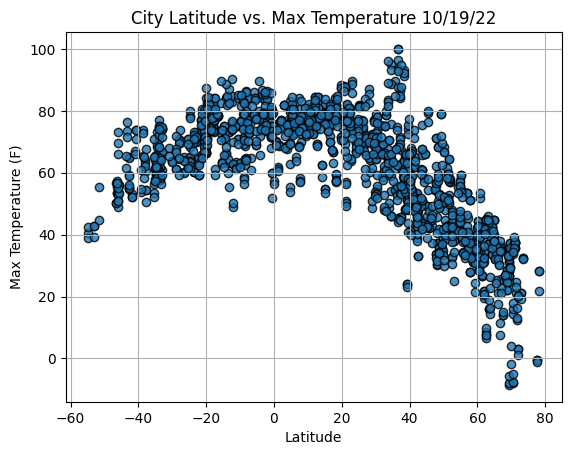

In [42]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

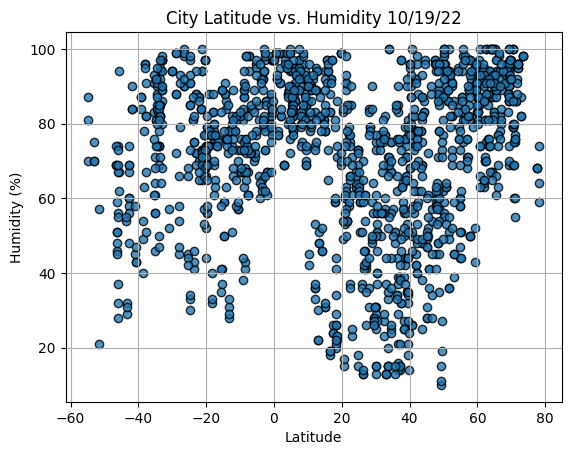

In [43]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

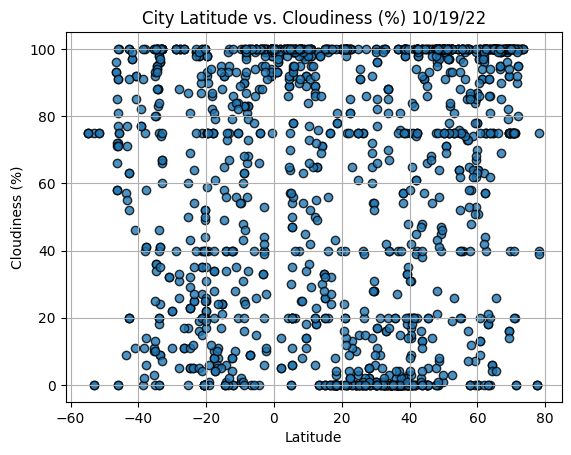

In [44]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

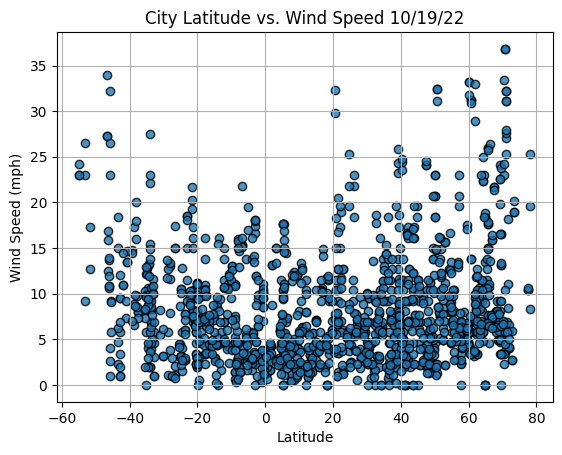

In [45]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [68]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [69]:
# Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: 0.6807670800013472


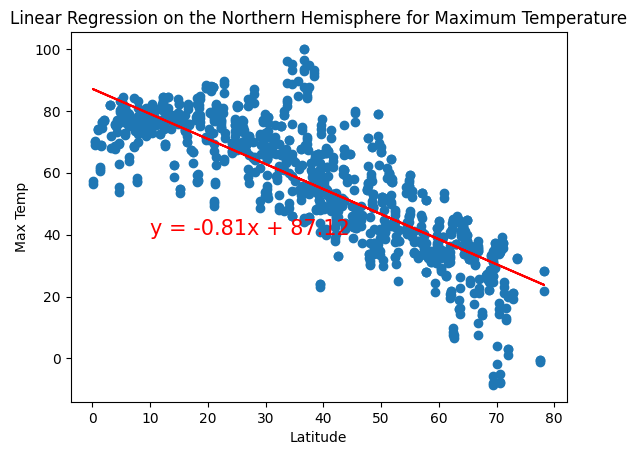

In [75]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
#plot_linear_regression(x_values, y_values, 'Max Temp',(10,40))

The r-value is: 0.4103524911827018


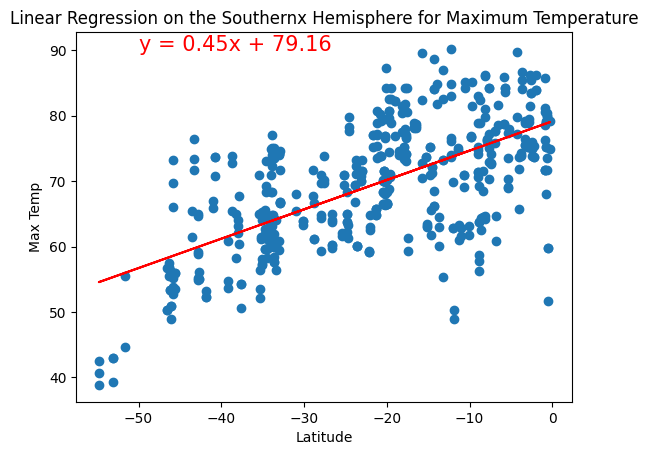

In [78]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southernx Hemisphere for Maximum Temperature','Max Temp',(-50,90))

The r-value is: 0.01714198468798519


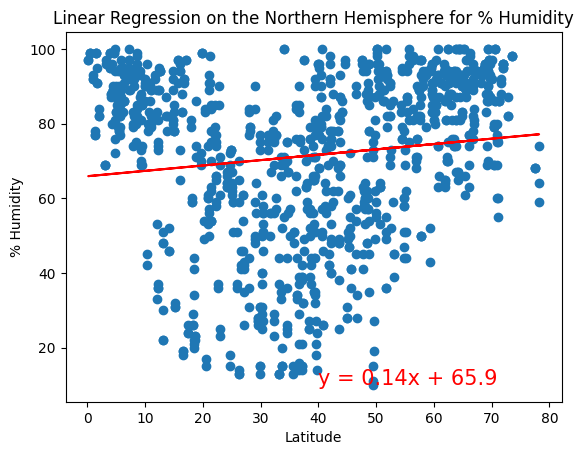

In [81]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

The r-value is: 0.03884682552943767


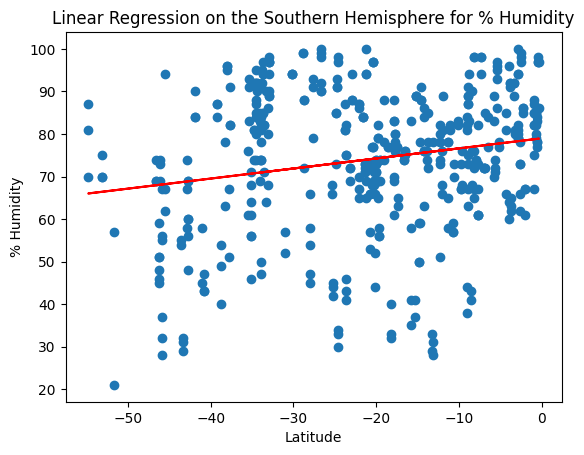

In [85]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

The r-value is: 0.02594754180906923


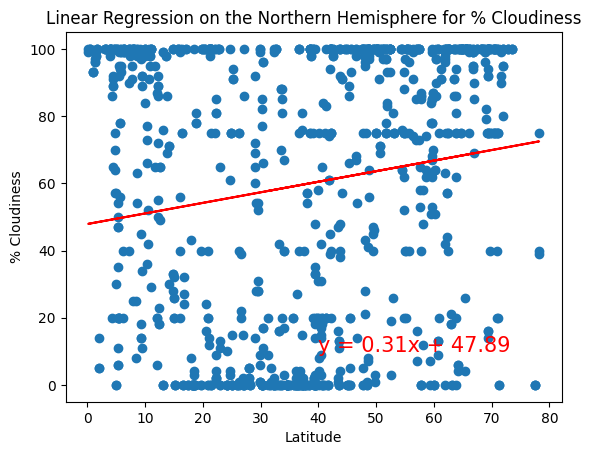

In [89]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

The r-value is: 0.003972688595113741


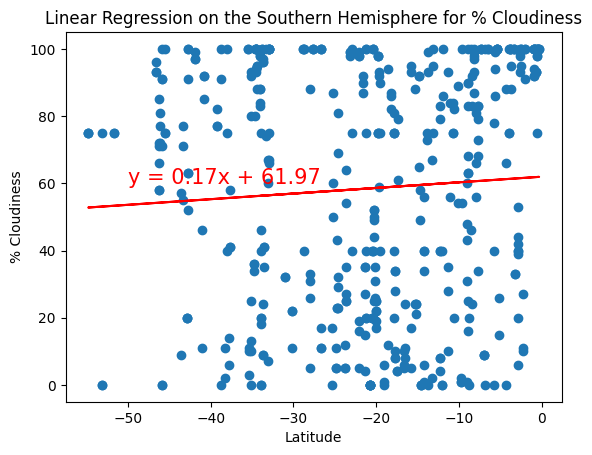

In [87]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

The r-value is: 0.08687832520570742


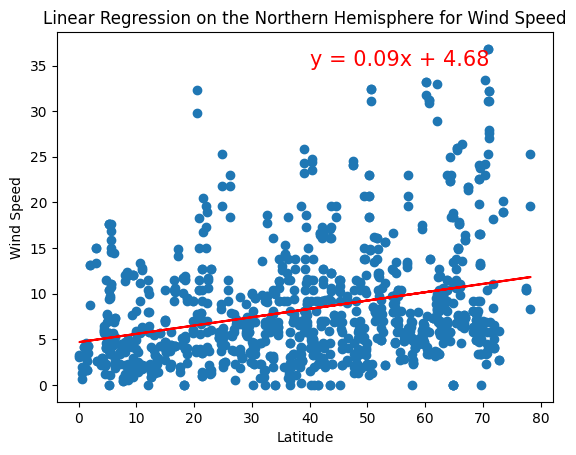

In [91]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

The r-value is: 0.10146094099761578


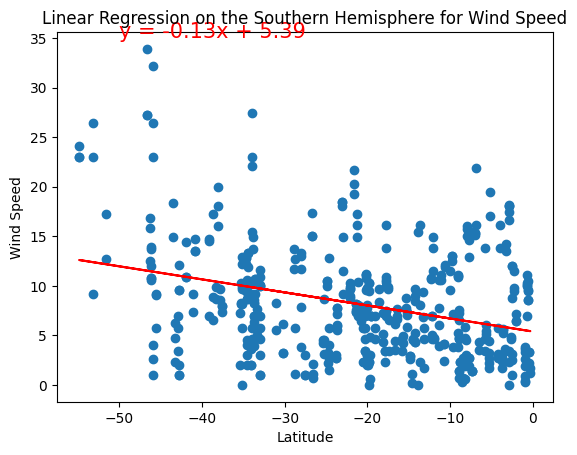

In [97]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                            'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
